In [1]:
from thundersvm import SVC
from utility import *

In [2]:
train_X=pd.read_csv('dataset/train_X.csv')
test_X=pd.read_csv('dataset/test_X.csv')

train_y=pd.read_csv('dataset/train_y.csv')
test_y=pd.read_csv('dataset/test_y.csv')

SVM with Linear Kernel

In [3]:
model=SVC(kernel='linear',n_jobs=-1)

properties={'C':[0.05,0.1,0.5,1,10]}

In [1]:
model_name='SVM_linear'

if 'model' in globals():
    
    best_model,result=model_selector(model,properties,train_X,train_y)
    save(best_model,result,model_name)
    
else:
    from thundersvm import SVC
    from utility import *
    
    train_X=pd.read_csv('dataset/train_X.csv')
    test_X=pd.read_csv('dataset/test_X.csv')

    train_y=pd.read_csv('dataset/train_y.csv')
    test_y=pd.read_csv('dataset/test_y.csv')
    
    best_model,result=load(model_name)

In [2]:
result[["param_C","mean_test_score","mean_train_score"]]

,param_C,mean_test_score,mean_train_score
0,0.1,0.943600,0.959607
1,0.5,0.939233,0.968806
2,1,0.936250,0.972635
3,10,0.925667,0.982517


In [3]:
pred_y=best_model.predict(test_X)

accuracy_score(test_y,pred_y)

0.9424

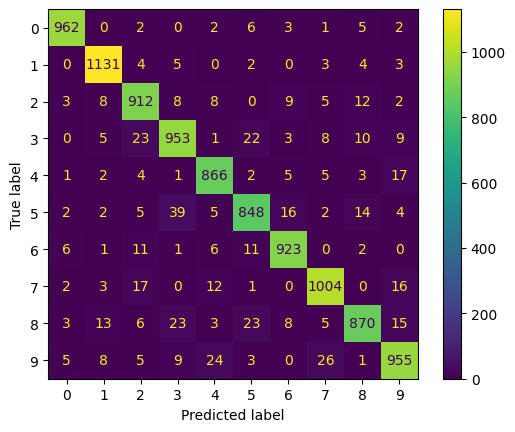

In [4]:
plot_confusion_matrix(test_y,pred_y)